In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
df_data = pd.read_csv("mnist_train.csv")
digit_data = np.array(df_data)
r, c = digit_data.shape

d_test = digit_data[0:1000].T
d_test_y = d_test[0]
d_test_x = d_test[1:c]

d_train = digit_data[1000:r].T
d_train_y = d_train[0]
d_train_x = d_train[1:c]

d_test_x.shape

(784, 1000)

In [3]:
class NeuralNetwork:
    def __init__(self, size):
        self.n_layers = len(size)-1
        self.size = size
        self.weights = [np.random.randn(y, x) for x, y in zip(size[:-1],size[1:])]
        self.biases = [np.random.randn(y, 1) for y in size[1:]]
    
    def forward_prop(self, data):
        activations = []
        for b, w in zip(self.biases, self.weights):
            data = self.sigmoid(np.dot(w, data) + b)
            activations.append(data)
        return data, activations
    
    def backprop(self, outputs, data, labels):
        
        output, activations = outputs
        
        targvec = self.onehot(labels)
        
        error = output - targvec      
        
        hidden_activations = activations[0]
        
        d_error = error * self.dsigmoid1(output)
        
        hidden_error = np.dot(self.weights[1].T, error)
        
        d_hidden_error =  hidden_error * self.dsigmoid1(hidden_activations)
        
        
        w1 = 1 / r * np.dot(error, hidden_activations.T)
        w0 = 1 / r * np.dot(d_hidden_error, data.T)
        b1 = 1 / r * np.sum(error)
        b0 = 1 / r * np.sum(d_hidden_error)
        
        return w0, w1, b0, b1
        
    def update_WB(self, w0, w1, b0, b1, lr):
        self.weights[1] = self.weights[1] - lr * w1
        self.weights[0] = self.weights[0] - lr * w0
        self.biases[1] = self.biases[1] - lr * b1
        self.biases[0] = self.biases[0] - lr * b0
        
        
    def train(self, data, labels, lr, iterations):
        for i in tqdm(range(iterations)):
            outputs = self.forward_prop(data)
            w0, w1, b0, b1 = self.backprop(outputs, data, labels)
            self.update_WB(w0, w1, b0, b1, lr)
        
        
    def onehot(self, label):
        targvec = np.zeros((label.size, label.max()+1))
        targvec[np.arange(label.size), label] = 1
        targvec = targvec.T
        return targvec
        
        
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def dsigmoid(self, x):
        return self.sigmoid(x)*(1- self.sigmoid(x))
    
    def dsigmoid1(self, x):
        return x * (1-x)
        

In [4]:


def get_pred(output):
    return np.argmax(output)

net = NeuralNetwork([784, 10, 10])
net.train(d_train_x, d_train_y, 3.0, 500)



  0%|          | 0/500 [00:00<?, ?it/s]<ipython-input-3-22ef6f03cbf0>:61: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
100%|██████████| 500/500 [02:54<00:00,  2.86it/s]


In [41]:

r, c = d_test_x.shape
count = 0
for i in range(1000):
    output, activations = net.forward_prop(d_test_x[:,[i]])
    prediction = get_pred(output)
    label = d_test_y[i]
    if prediction == label:
        print("prediction:",prediction,"==","label:", label)
        print("EQUAL")
        count += 1
    else:
        print("prediction:",prediction,"label:", label)

print(count,"/", c)


<ipython-input-3-22ef6f03cbf0>:61: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


prediction: 5 == label: 5
EQUAL
prediction: 0 == label: 0
EQUAL
prediction: 2 label: 4
prediction: 1 == label: 1
EQUAL
prediction: 9 == label: 9
EQUAL
prediction: 8 label: 2
prediction: 1 == label: 1
EQUAL
prediction: 3 == label: 3
EQUAL
prediction: 1 == label: 1
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 3 == label: 3
EQUAL
prediction: 3 label: 5
prediction: 3 == label: 3
EQUAL
prediction: 6 == label: 6
EQUAL
prediction: 1 == label: 1
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 8 label: 2
prediction: 8 == label: 8
EQUAL
prediction: 6 == label: 6
EQUAL
prediction: 7 label: 9
prediction: 4 == label: 4
EQUAL
prediction: 0 == label: 0
EQUAL
prediction: 9 == label: 9
EQUAL
prediction: 1 == label: 1
EQUAL
prediction: 5 label: 1
prediction: 2 == label: 2
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 3 == label: 3
EQUAL
prediction: 7 label: 2
prediction: 1 label: 7
prediction: 2 label: 3
prediction: 8 == label: 8
EQUAL
prediction: 6 == label: 6
EQUAL
prediction: 7 label: 9
pr

prediction: 7 == label: 7
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 4 label: 9
prediction: 2 == label: 2
EQUAL
prediction: 5 == label: 5
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 2 == label: 2
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 8 label: 2
prediction: 1 == label: 1
EQUAL
prediction: 9 == label: 9
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 2 == label: 2
EQUAL
prediction: 8 == label: 8
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 6 == label: 6
EQUAL
prediction: 9 == label: 9
EQUAL
prediction: 2 == label: 2
EQUAL
prediction: 2 == label: 2
EQUAL
prediction: 3 == label: 3
EQUAL
prediction: 8 == label: 8
EQUAL
prediction: 2 label: 1
prediction: 6 == label: 6
EQUAL
prediction: 5 == label: 5
EQUAL
prediction: 1 == label: 1
EQUAL
prediction: 1 == label: 1
EQUAL
prediction: 0 == label: 0
EQUAL
prediction: 2 == label: 2
EQUAL
prediction: 6 == label: 6
EQUAL
prediction: 4 == label: 4
EQUAL
pre

prediction: 6 == label: 6
EQUAL
prediction: 5 == label: 5
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 2 label: 8
prediction: 3 label: 8
prediction: 9 == label: 9
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 7 == label: 7
EQUAL
prediction: 3 == label: 3
EQUAL
prediction: 2 == label: 2
EQUAL
prediction: 0 == label: 0
EQUAL
prediction: 8 == label: 8
EQUAL
prediction: 6 == label: 6
EQUAL
prediction: 3 label: 8
prediction: 6 == label: 6
EQUAL
prediction: 1 == label: 1
EQUAL
prediction: 6 == label: 6
EQUAL
prediction: 5 label: 8
prediction: 9 == label: 9
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 0 == label: 0
EQUAL
prediction: 7 label: 9
prediction: 0 == label: 0
EQUAL
prediction: 4 == label: 4
EQUAL
prediction: 1 == label: 1
EQUAL
prediction: 3 label: 5
prediction: 9 label: 4
prediction: 7 == label: 7
EQUAL
prediction: 5 == label: 5
EQUAL
prediction: 3 == label: 3
EQUAL
prediction: 7 == label: 7
EQUAL
predict

In [49]:
import matplotlib.pyplot as plt
def test(i):
    plt.imshow(d_test_x[:,[i]].reshape(28, 28)*255)
    plt.show
    output, activations = net.forward_prop(d_test_x[:,[i]])
    print(get_pred(output))
    

4


<ipython-input-3-22ef6f03cbf0>:61: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


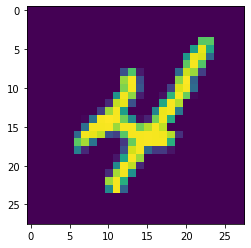

In [57]:
test(9)